In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pwd

'C:\\Users\\arjun'

In [3]:
df1 = pd.read_csv(r'C:\Users\arjun\Sales_Data\Sales_January_2019.csv')
df2 = pd.read_csv(r'C:\Users\arjun\Sales_Data\Sales_February_2019.csv')
df3 = pd.read_csv(r'C:\Users\arjun\Sales_Data\Sales_March_2019.csv')
df4 = pd.read_csv(r'C:\Users\arjun\Sales_Data\Sales_April_2019.csv')
df5 = pd.read_csv(r'C:\Users\arjun\Sales_Data\Sales_May_2019.csv')
df6 = pd.read_csv(r'C:\Users\arjun\Sales_Data\Sales_June_2019.csv')
df7 = pd.read_csv(r'C:\Users\arjun\Sales_Data\Sales_July_2019.csv')
df8 = pd.read_csv(r'C:\Users\arjun\Sales_Data\Sales_August_2019.csv')
df9 = pd.read_csv(r'C:\Users\arjun\Sales_Data\Sales_September_2019.csv')
df10 = pd.read_csv(r'C:\Users\arjun\Sales_Data\Sales_October_2019.csv')
df11 = pd.read_csv(r'C:\Users\arjun\Sales_Data\Sales_November_2019.csv')
df12 = pd.read_csv(r'C:\Users\arjun\Sales_Data\Sales_December_2019.csv')


In [4]:
all_df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [5]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


# Cleaning of dataset

In [6]:
all_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
all_df.dropna(how='all',inplace=True)

In [8]:
all_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
all_df=all_df[all_df['Order Date'].str[0:2]!='Or']

In [11]:
all_df['Month'] = all_df['Order Date'].str[0:2].astype('int32')
all_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1


In [12]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [13]:
all_df['Quantity Ordered'] = all_df['Quantity Ordered'].astype('int32')
all_df['Price Each'] = all_df['Price Each'].astype('float')

In [14]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 9.9+ MB


In [15]:
all_df['City'] = all_df['Purchase Address'].str.split(',').str.get(1)
all_df['State'] = all_df['Purchase Address'].str.split(',').str.get(2).str.split(' ').str.get(1)
all_df['ZipCode'] = all_df['Purchase Address'].str.split(',').str.get(2).str.split(' ').str.get(2)
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,ZipCode
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston,MA,02215
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland,OR,97035
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco,CA,94016
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles,CA,90001
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin,TX,73301


In [16]:
all_df['Month'] = all_df['Month'].astype('int32')
all_df['City'] = all_df['City'].astype('category')
all_df['State'] = all_df['State'].astype('category')
all_df['ZipCode'] = all_df['ZipCode'].astype('int32')

In [17]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Order ID          185950 non-null  object  
 1   Product           185950 non-null  object  
 2   Quantity Ordered  185950 non-null  int32   
 3   Price Each        185950 non-null  float64 
 4   Order Date        185950 non-null  object  
 5   Purchase Address  185950 non-null  object  
 6   Month             185950 non-null  int32   
 7   City              185950 non-null  category
 8   State             185950 non-null  category
 9   ZipCode           185950 non-null  int32   
dtypes: category(2), float64(1), int32(3), object(4)
memory usage: 11.0+ MB


# Question 1: What was the best month for sales? How much was earned that month?

In [18]:
all_df['Sales'] = all_df['Quantity Ordered'] * all_df['Price Each']
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,ZipCode,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston,MA,2215,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland,OR,97035,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco,CA,94016,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles,CA,90001,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin,TX,73301,11.99


In [19]:
all_df.groupby(by='Month').sum()

,Quantity Ordered,Price Each,ZipCode,Sales
Month,,,,
1,10903,1.811768e+06,617411381,1.822257e+06
2,13449,2.188885e+06,766383158,2.202022e+06
3,17005,2.791208e+06,968473926,2.807100e+06
4,20558,3.367671e+06,1172922735,3.390670e+06
5,18667,3.135125e+06,1049812600,3.152607e+06
6,15253,2.562026e+06,872010789,2.577802e+06
7,16072,2.632540e+06,909268514,2.647776e+06
8,13448,2.230345e+06,765306061,2.244468e+06
9,13109,2.084992e+06,741130288,2.097560e+06


range(1, 13)


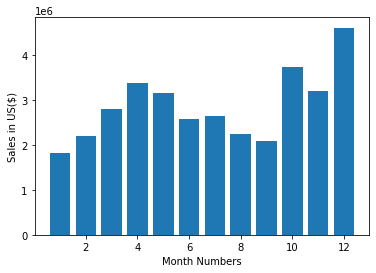

In [20]:
months=range(1,13)
print(months)
plt.plot(figsize=(10,6))
plt.bar(months,all_df.groupby(by='Month').sum()['Sales'])

plt.xlabel('Month Numbers')
plt.ylabel('Sales in US($)')
plt.show()

### Q-2 What city sold the most product?

In [21]:
all_df.groupby(by='City').sum()

,Quantity Ordered,Price Each,Month,ZipCode,Sales
City,,,,,
Atlanta,16602.0,2.779908e+06,104794.0,4.509092e+08,2.795499e+06
Austin,11153.0,1.809874e+06,69829.0,7.260464e+08,1.819582e+06
Boston,22528.0,3.637410e+06,141112.0,4.415381e+07,3.661642e+06
Dallas,16730.0,2.752628e+06,104620.0,1.111515e+09,2.767975e+06
Los Angeles,33289.0,5.421435e+06,208325.0,2.664480e+09,5.452571e+06
New York City,27932.0,4.635371e+06,175741.0,2.487849e+08,4.664317e+06
Portland,14053.0,2.307747e+06,87765.0,9.813883e+08,2.320491e+06
San Francisco,50239.0,8.211462e+06,315520.0,4.205524e+09,8.262204e+06
Seattle,16553.0,2.733296e+06,104941.0,1.445224e+09,2.747755e+06


In [22]:
x=[' Atlanta',' Austin',' Boston', ' Dallas',' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']
y=all_df.groupby(by='City').sum()['Sales']


C:\Users\arjun\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


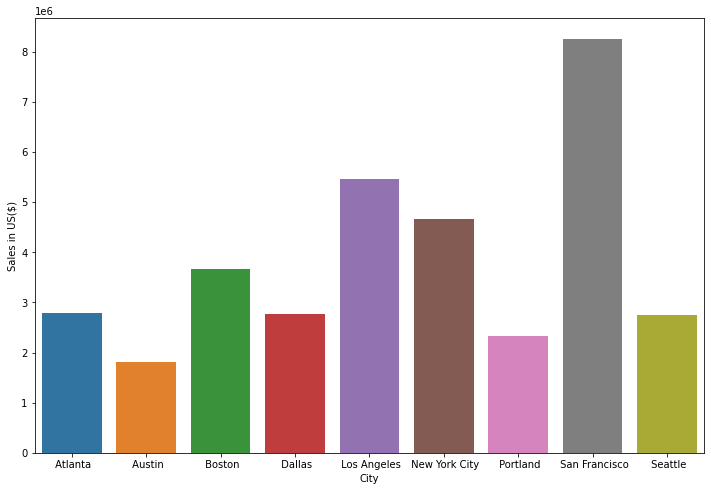

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(x,y,orient='v')
plt.xlabel('City')
plt.ylabel('Sales in US($)')
plt.show()

### Q-3 What time should we display advertisements to maximize likelihood of customer's buying product ?

In [24]:
all_df['Hour'] = pd.to_datetime(all_df['Order Date']).dt.hour
all_df['Minute'] = pd.to_datetime(all_df['Order Date']).dt.minute
all_df['Count'] =1
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,ZipCode,Sales,Hour,Minute,Count
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston,MA,2215,700.00,21,25,1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland,OR,97035,14.95,14,15,1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco,CA,94016,23.98,13,33,1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles,CA,90001,149.99,20,33,1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin,TX,73301,11.99,11,59,1


In [25]:
all_df.groupby(by='Hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,ZipCode,Sales,Minute,Count
Hour,,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [26]:
x= range(0,24)
y=all_df.groupby(by='Hour').count()['Count']

C:\Users\arjun\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


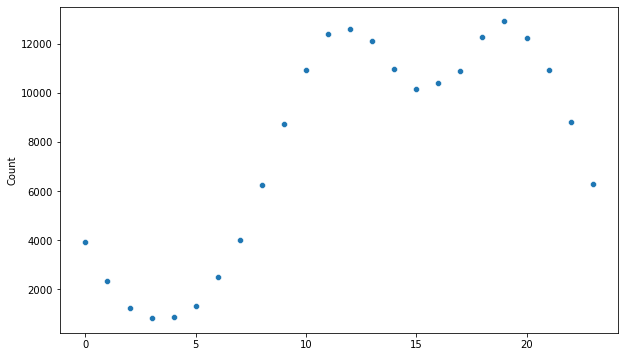

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x,y)
plt.show()

### Q-4 What product sold the most?

In [28]:
all_df['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64